In [1]:
from river.datasets import synth
from river import evaluate
from river import metrics
from river import tree as river_tree

In [2]:
from tree_diff.tree_ruleset_conversion import *
from tree_diff.similar_tree import * 
from tree_diff.conversion import *

In [3]:
model = river_tree.ExtremelyFastDecisionTreeClassifier(
    leaf_prediction = 'mc'
)

In [4]:
gen = synth.Agrawal(classification_function=0, seed=42)

In [5]:
batch1 = iter(gen.take(10)) # small batch (to demonstrate small tree, but can also happen when low signal)

In [6]:
metric = metrics.Accuracy()

In [7]:
evaluate.progressive_val_score(batch1, model, metric)

Accuracy: 77.78%

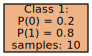

In [8]:
model.draw()

In [9]:
batch1_rules = Ruleset(river_extract_rules(model._root, river_children, river_is_leaf))

In [10]:
batch1_rules

r0:  → 1

In [11]:
batch2 = iter(gen.take(10)) # small batch (to demonstrate small tree, but can also happen when low signal)

In [12]:
evaluate.progressive_val_score(batch2, model, metric)

Accuracy: 78.95%

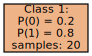

In [13]:
model.draw()

In [14]:
batch2_rules = Ruleset(river_extract_rules(model._root, river_children, river_is_leaf))

In [15]:
batch2_rules

r0:  → 1

In [16]:
rule_set_similarity(batch1_rules, batch2_rules)

Warn: caught division by zero in rule_set_similarity


nan

Bugs:
* Similarity of two trees that consist of a single root node leads to division by zero error in rule_set_similarity calculation (as temporary work-around this has been wrapped in try/except block)

In [17]:
import pandas as pd
import numpy as np

from tree_diff.tree_ruleset_conversion import *
from tree_diff.similar_tree import * 
from tree_diff.conversion import * 
import tree_diff.tree_metrics as tree_metrics
from tree_diff import tree, keep_regrow_alg

In [18]:
batch3 = iter(gen.take(10)) # small batch (to demonstrate small tree, but can also happen when low signal)
X, y = zip(*batch3)
X_train = pd.DataFrame(X)
y_train = np.array(y)

In [19]:
X_train

,salary,commission,age,elevel,car,zipcode,hvalue,hyears,loan
0,103125.483800,0.000000,21,2,8,3,319768.964263,4,338349.743711
1,135983.343802,0.000000,25,4,14,0,423837.775550,7,116330.446695
2,98262.434776,0.000000,55,1,18,6,144088.124408,19,139095.354115
3,133009.041703,0.000000,68,1,14,5,233361.402501,7,478606.536103
4,63757.290865,16955.938254,26,2,12,4,522851.309310,24,229712.439836
5,36227.401171,79172.152902,25,4,10,5,323205.643577,23,34777.574412
6,105964.231414,0.000000,69,2,3,3,683241.833378,13,138986.801555
7,102638.977754,0.000000,43,1,12,5,212852.109231,9,350910.156729
8,108861.196520,0.000000,24,4,6,8,0.000000,6,231130.105926
9,55093.217482,79404.338472,64,4,8,5,402855.576057,25,27968.973775


In [20]:
y_train

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [21]:
batch_tree = keep_regrow_alg.grow_tree(
    X_train,
    y_train,
    alpha = 10,
    beta = 0, # no change penalty for first tree (else would double penalise)
    grow_func = keep_regrow_alg.sklearn_grow_func,
    max_depth = float('inf')
)

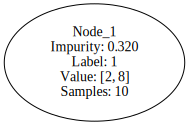

In [22]:
batch_tree.plot()

In [23]:
tuple_tree_conversion(batch_tree)

UnboundLocalError: local variable 'visit' referenced before assignment

Bugs:
* Error in tuple_tree_conversion for trees that consist of a single root node